<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A7 Boosting.R_Boosting
</h1>

## Descripción:

### En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de Boosting

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [1]:
if(!require(cart)){
    install.packages('cart',repos='http://cran.es.r-project.org')
    require(cart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
set.seed(17)

Loading required package: cart
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'cart'"Installing package into 'C:/Users/rcaih/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'cart' is not available (for R version 3.3.2)"Loading required package: cart
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'cart'"Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: C50
Loading required package: car
Warning message:
"package 'car' was built under R version 3.3.3"Loading required package: plyr


### Carga de los datos. 

In [2]:
wdbc=read.table(  url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
  sep=",", header=FALSE)
dim(wdbc)

[1] 699  11

### Preparación de los datos

In [3]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))
wdbc=wdbc[complete.cases(wdbc),]
dataset <- wdbc[,(2:11)]

### Parámetros de creación del modelo

In [4]:
# Paso de kfolds
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)
# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"
grid <- expand.grid( .winnow = c(FALSE), .trials=c(1,5,10,15,25,50,75,100), .model="tree" )

### Creamos un modelo de árbol con el método de boosting.

In [5]:
model.boost <- train(as.factor(V11)~., tuneGrid=grid,data=dataset, method="C5.0",metric=metric, trControl=control)

### Matriz de confusión

In [6]:
confusionMatrix(model.boost)


Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    2    4
         2 63.1  0.8
         4  1.9 34.2
                            
 Accuracy (average) : 0.9727


###  Mostramos todas sus características.

C5.0 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 616, 614, 615, 614, 615, 614, ... 
Resampling results across tuning parameters:

  trials  Accuracy   Kappa    
    1     0.9511858  0.8923892
    5     0.9536083  0.8974324
   10     0.9619419  0.9165155
   15     0.9638958  0.9209938
   25     0.9677816  0.9297186
   50     0.9702401  0.9352261
   75     0.9712276  0.9374236
  100     0.9726911  0.9406060

Tuning parameter 'model' was held constant at a value of tree
Tuning
 parameter 'winnow' was held constant at a value of FALSE
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were trials = 100, model = tree and
 winnow = FALSE. 


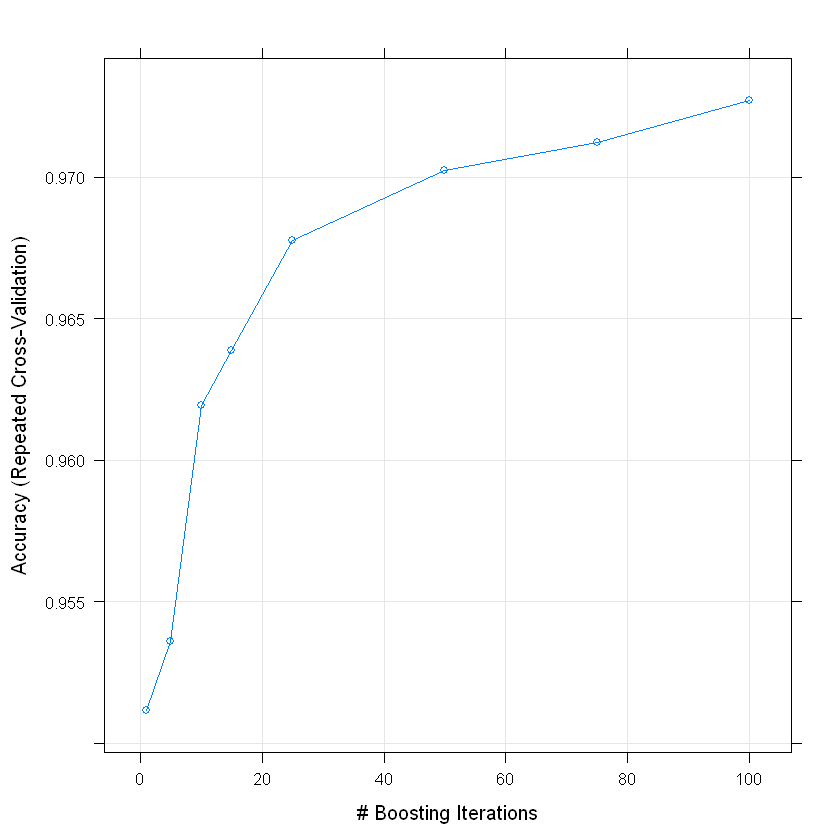

In [7]:
print(model.boost)
plot(model.boost)